In [8]:
!pip install yfinance pandas numpy matplotlib seaborn fredapi

In [67]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

folder_path = os.path.join('project_data', 'raw_data')

ticker = "BGRN"
print(f"Downloading {ticker}...")

try:
    bgrn = yf.download(ticker, period="max", progress=False)
    
    print(f"Downloaded {len(bgrn)} records from {bgrn.index[0].date()} to {bgrn.index[-1].date()}")
    
    file_path = os.path.join(folder_path, f'{ticker}_data.csv')
    bgrn.to_csv(file_path)
        
except Exception as e:
    print(f"Error: {e}")

C:\Users\HP\AppData\Local\Temp\ipykernel_21860\2414625844.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  bgrn = yf.download(ticker, period="max", progress=False)


Downloaded 1658 records from 2018-11-27 to 2025-07-03


In [7]:
print(f"Columns: {list(bgrn.columns)}")
print(f"Shape: {bgrn.shape}")

Columns: [('Close', 'BGRN'), ('High', 'BGRN'), ('Low', 'BGRN'), ('Open', 'BGRN'), ('Volume', 'BGRN')]
Shape: (1656, 5)


In [17]:
print("First 5 rows:")
print(bgrn.head())

print("\nLast 5 rows:")
print(bgrn.tail())

print("\nMissing values:")
print(bgrn.isnull().sum())

price_col = "Close"

print(f"\nPrice statistics:")
print(bgrn[price_col].describe())

First 5 rows:
Price           Close       High        Low       Open Volume
Ticker           BGRN       BGRN       BGRN       BGRN   BGRN
Date                                                         
2018-11-27  41.616829  41.616829  41.616829  41.616829    400
2018-11-28  41.554688  41.583686  41.554688  41.563803   1100
2018-11-29  41.554688  41.554688  41.554688  41.554688      0
2018-11-30  41.684761  41.684761  41.684761  41.684761    200
2018-12-03  41.684761  41.684761  41.684761  41.684761      0

Last 5 rows:
Price           Close       High        Low       Open Volume
Ticker           BGRN       BGRN       BGRN       BGRN   BGRN
Date                                                         
2025-06-25  47.293736  47.303703  47.204051  47.253875  25300
2025-06-26  47.388401  47.433242  47.283769  47.283769  29100
2025-06-27  47.333595  47.453174  47.315657  47.315657  17800
2025-06-30  47.502998  47.512965  47.355518  47.433244  19300
2025-07-01  47.480000  47.523998  47.41000

Plot saved to plots\BGRN_price_plot.png


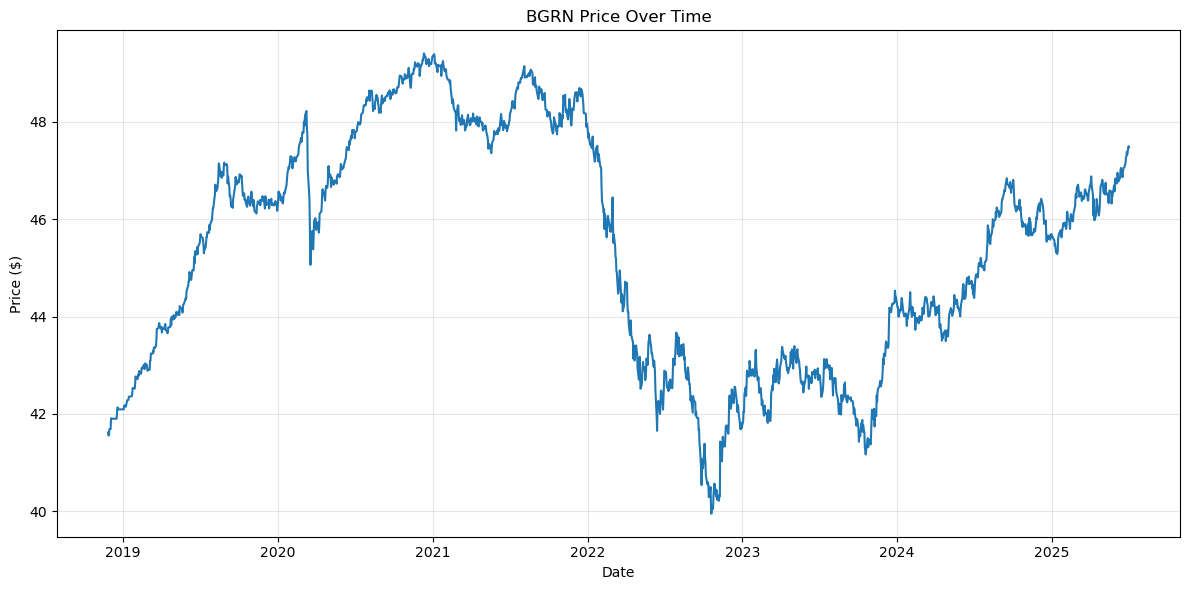

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(bgrn.index, bgrn[price_col])
plt.title(f'{ticker} Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join('plots', f'{ticker}_price_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

This resources is helpfull: https://gregorygundersen.com/blog/2022/02/06/log-returns/

I have to analyze the log returns of the stock prices of BGRN further on. 

There is also an idea to make some P-P plots comparing different indices.

Volume plot saved to plots\BGRN_volume_plot


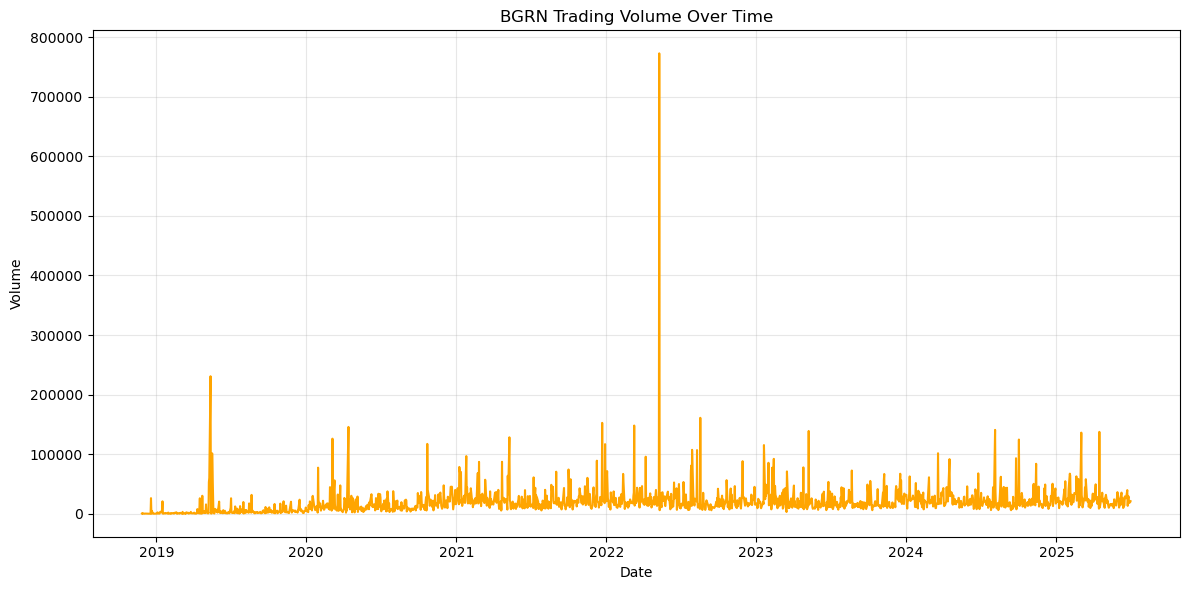

In [18]:
volume_col = 'Volume'

plt.figure(figsize=(12, 6))
plt.plot(bgrn.index, bgrn[volume_col], color='orange')
plt.title(f'{ticker} Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join('plots', f'{ticker}_volume_plot')
plt.savefig(plot_path)
print(f"Volume plot saved to {plot_path}")

plt.show()

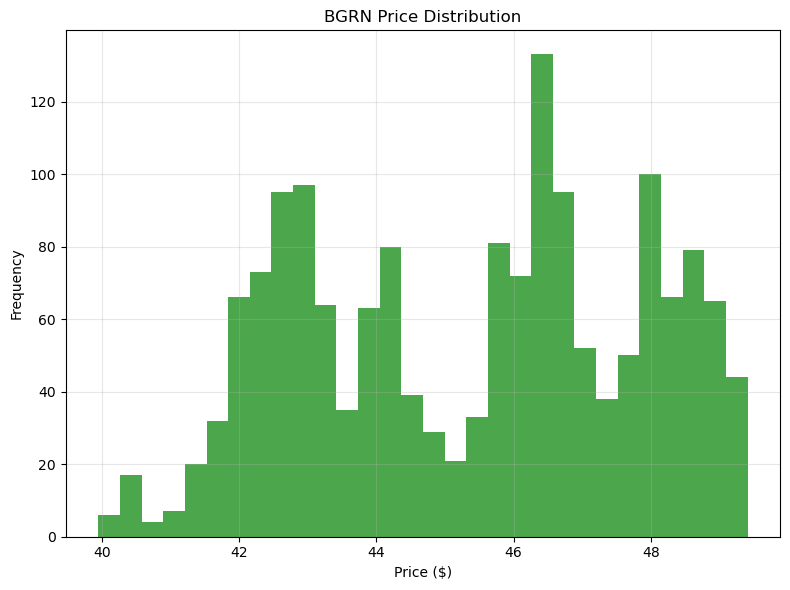

In [19]:
plt.figure(figsize=(8, 6))
plt.hist(bgrn[price_col], bins=30, alpha=0.7, color='green')
plt.title(f'{ticker} Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Most common price range is located around $46-47. Presumably, because of several significant secondary peaks, the stock has had different preffered price levels at different times. In general, the spread shows the stock's typical trading range.  

In [42]:
daily_returns = bgrn[price_col].pct_change().dropna()
annual_volatility = daily_returns.std() * np.sqrt(252)

print(f"BGRN annual volatility: {annual_volatility['BGRN']:.1%}")

BGRN annual volatility: 5.2%


Let's calculate the annual volatility of our stock. For that we need to find daily returns and calculate respective standart deviation which gives us the daily volatility. Then by applying square root of time rule we'll be able to find annual volatility. 

https://gregorygundersen.com/blog/2022/05/24/square-root-of-time-rule/


Also in this article, author is actively trying to prove that low-volatility stocks can outperform in the long run the high-volatility stocks. 

https://blogs.cfainstitute.org/investor/2024/02/16/the-low-volatility-factor-and-occams-razor/



In [43]:
avg_daily_change = abs(daily_returns).mean()
print(f"Average daily price movement: {avg_daily_change['BGRN']:.2%}")

Average daily price movement: 0.24%


In [39]:
print("Downloading benchmark data...")

benchmark_indices = ["SPY", "SPLV"]

spy = yf.download(benchmark_indices[0], period="max", progress=False)
splv = yf.download(benchmark_indices[1], period="max", progress=False)

spy.to_csv(os.path.join(folder_path, f'{benchmark_indices[0]}_data.csv'))
splv.to_csv(os.path.join(folder_path, f'{benchmark_indices[1]}_data.csv'))

print(f"{benchmark_indices[0]}: {len(spy)} records from {spy.index[0].date()} to {spy.index[-1].date()}")
print(f"{benchmark_indices[1]}: {len(splv)} records from {splv.index[0].date()} to {splv.index[-1].date()}")

C:\Users\HP\AppData\Local\Temp\ipykernel_21860\4073845048.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy = yf.download(benchmark_indices[0], period="max", progress=False)
C:\Users\HP\AppData\Local\Temp\ipykernel_21860\4073845048.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  splv = yf.download(benchmark_indices[1], period="max", progress=False)


SPY: 8162 records from 1993-01-29 to 2025-07-02
SPLV: 3561 records from 2011-05-05 to 2025-07-02


In [48]:
common_start = max(bgrn.index[0], spy.index[0], splv.index[0])
common_end = min(bgrn.index[-1], spy.index[-1], splv.index[-1])

print(f"Comparing over common period: {common_start.date()} to {common_end.date()}")

bgrn_common = bgrn[common_start:common_end]
spy_common = spy[common_start:common_end]
splv_common = splv[common_start:common_end]

bgrn_returns = bgrn_common[price_col].pct_change().dropna()
spy_returns = spy_common[price_col].pct_change().dropna()
splv_returns = splv_common[price_col].pct_change().dropna()

bgrn_vol = bgrn_returns.std() * np.sqrt(252)
spy_vol = spy_returns.std() * np.sqrt(252)
splv_vol = splv_returns.std() * np.sqrt(252)

bgrn_daily = abs(bgrn_returns).mean()
spy_daily = abs(spy_returns).mean()
splv_daily = abs(splv_returns).mean()

print(f"Period: {len(bgrn_returns)} trading days")
print()
print("Annual Volatility:")
print(f"BGRN (ESG ETF):           {bgrn_vol['BGRN']:.2%}")
print(f"SPY (S&P 500):            {spy_vol['SPY']:.2%}")
print(f"SPLV (S&P 500 Low Vol):   {splv_vol['SPLV']:.2%}")
print()
print("Average Daily Movement:")
print(f"BGRN:  {bgrn_daily['BGRN']:.2%}")
print(f"SPY:   {spy_daily['SPY']:.2%}")
print(f"SPLV:  {splv_daily['SPLV']:.2%}")
print()
print(f"BGRN vs SPY: {bgrn_vol['BGRN']/spy_vol['SPY']:.2f}x the volatility")
print(f"BGRN vs SPLV: {bgrn_vol['BGRN']/splv_vol['SPLV']:.2f}x the volatility")
print(f"SPLV vs SPY: {splv_vol['SPLV']/spy_vol['SPY']:.2f}x the volatility")

Comparing over common period: 2018-11-27 to 2025-07-01
Period: 1655 trading days

Annual Volatility:
BGRN (ESG ETF):           5.22%
SPY (S&P 500):            20.45%
SPLV (S&P 500 Low Vol):   17.63%

Average Daily Movement:
BGRN:  0.24%
SPY:   0.84%
SPLV:  0.68%

BGRN vs SPY: 0.26x the volatility
BGRN vs SPLV: 0.30x the volatility
SPLV vs SPY: 0.86x the volatility


Plot saved to plots\comparison_price_plot.png


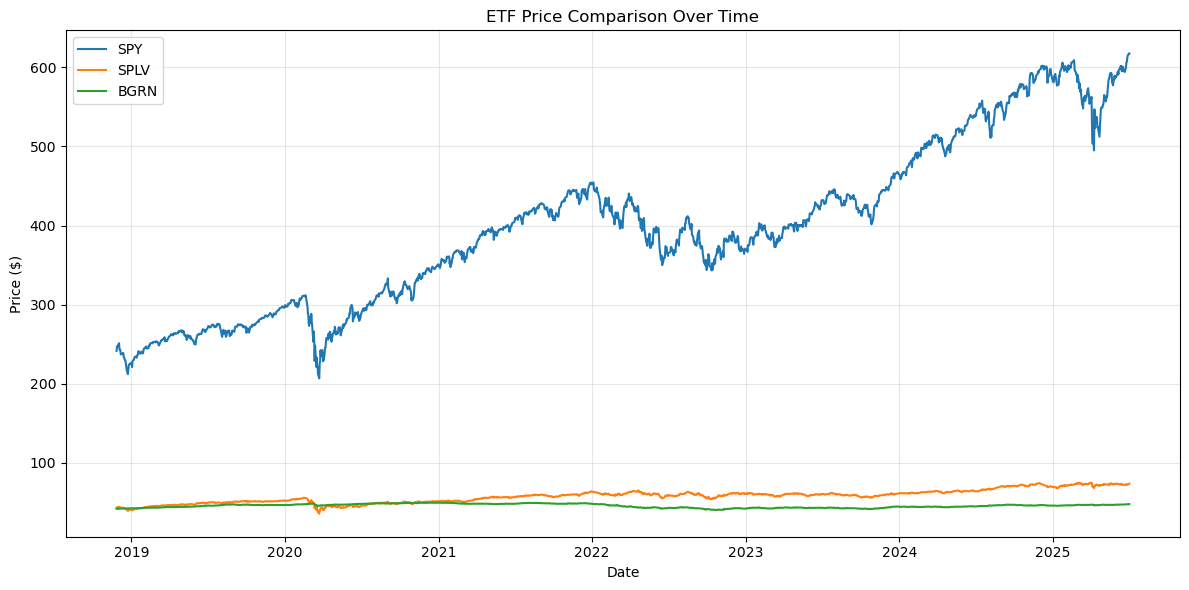

In [52]:
plt.figure(figsize=(12, 6))

plt.plot(spy_common.index, spy_common[price_col], label=benchmark_indices[0])
plt.plot(splv_common.index, splv_common[price_col], label=benchmark_indices[1])
plt.plot(bgrn.index, bgrn[price_col], label=ticker)

plt.title("ETF Price Comparison Over Time")
plt.xlabel('Date')
plt.ylabel('Price ($)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join('plots', 'comparison_price_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

Plot saved to plots\normalized_comparison_price_plot.png


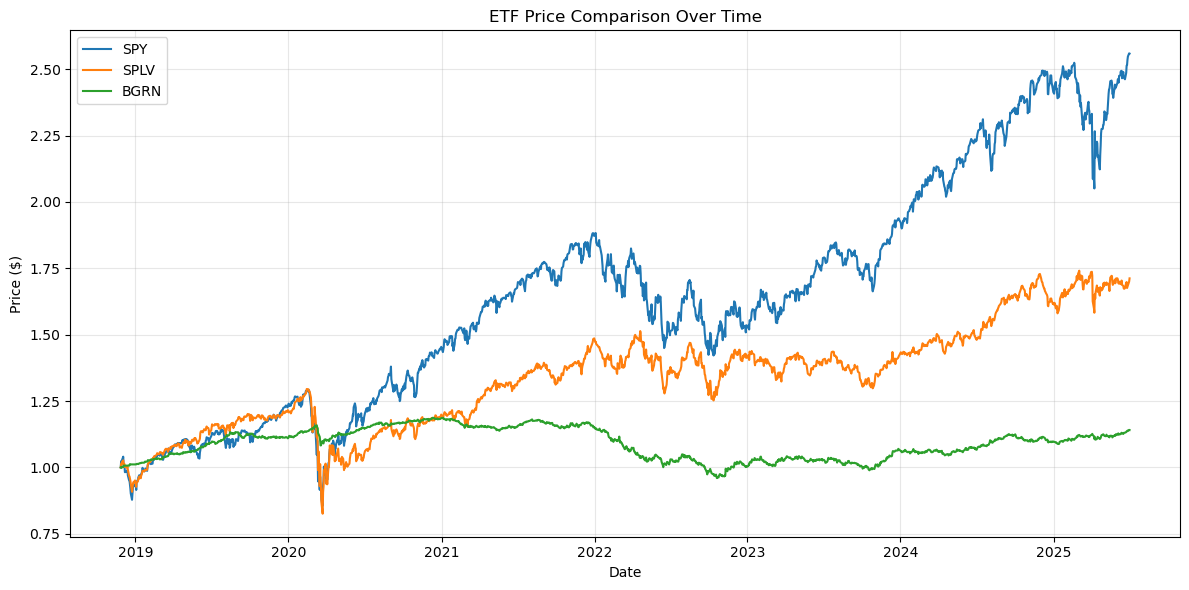

In [57]:
spy_norm = spy_common[price_col] / spy_common[price_col].iloc[0]
splv_norm = splv_common[price_col] / splv_common[price_col].iloc[0]
bgrn_norm = bgrn[price_col] / bgrn[price_col].iloc[0]

plt.figure(figsize=(12, 6))

plt.plot(spy_common.index, spy_norm, label=benchmark_indices[0])
plt.plot(splv_common.index, splv_norm, label=benchmark_indices[1])
plt.plot(bgrn_common.index, bgrn_norm, label=ticker)

plt.title("ETF Price Comparison Over Time")
plt.xlabel('Date')
plt.ylabel('Price ($)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join('plots', 'normalized_comparison_price_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

As we can see, BGRN shows minimal price movement. It can be compared to SPLV, which performs better in terms of returns. However, the explnation though is quite simple: BGRN is a bond ETF, while SPY and SPLV are stock ETFs. That's why BGRN has much lower price fluctuations and volatility.

https://www.ishares.com/us/products/305296/ishares-usd-green-bond-etf

Then let's perform a benchmarking analysis of the BGRN compared to other bonds.

In [58]:
agg = yf.download("AGG", period="max", progress=False)  # Total Bond Market
lqd = yf.download("LQD", period="max", progress=False)  # Investment Grade Corporate
tlt = yf.download("TLT", period="max", progress=False)  # Long-Term Treasury
hyg = yf.download("HYG", period="max", progress=False)  # High Yield (for contrast)

for ticker, data in [("AGG", agg), ("LQD", lqd), ("TLT", tlt), ("HYG", hyg)]:
    data.to_csv(os.path.join(folder_path, f'{ticker}_data.csv'))
    print(f"{ticker}: {len(data)} records from {data.index[0].date()} to {data.index[-1].date()}")

C:\Users\HP\AppData\Local\Temp\ipykernel_21860\1470501030.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  agg = yf.download("AGG", period="max", progress=False)  # Total Bond Market
C:\Users\HP\AppData\Local\Temp\ipykernel_21860\1470501030.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  lqd = yf.download("LQD", period="max", progress=False)  # Investment Grade Corporate
C:\Users\HP\AppData\Local\Temp\ipykernel_21860\1470501030.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tlt = yf.download("TLT", period="max", progress=False)  # Long-Term Treasury
C:\Users\HP\AppData\Local\Temp\ipykernel_21860\1470501030.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  hyg = yf.download("HYG", period="max", progress=False)  # High Yield (for contrast)


AGG: 5476 records from 2003-09-29 to 2025-07-03
LQD: 5770 records from 2002-07-30 to 2025-07-03
TLT: 5770 records from 2002-07-30 to 2025-07-03
HYG: 4588 records from 2007-04-11 to 2025-07-03


In [114]:
common_start = max(bgrn.index[0], agg.index[0], lqd.index[0], tlt.index[0], hyg.index[0])
common_end = min(bgrn.index[-1], agg.index[-1], lqd.index[-1], tlt.index[-1], hyg.index[-1])

bond_data = {}
for name, df in [("BGRN", bgrn), ("AGG", agg), ("LQD", lqd), ("TLT", tlt), ("HYG", hyg)]:
    bond_data[name] = df[common_start:common_end][price_col]

bond_prices = pd.concat(bond_data.values(), axis=1)
bond_prices.columns = bond_data.keys()

print(f"Analysis period: {common_start.date()} to {common_end.date()}")
print(f"Total observations: {len(bond_prices)}")


Analysis period: 2018-11-27 to 2025-07-03
Total observations: 1658


Plot saved to plots\bond_comparison_price_plot.png


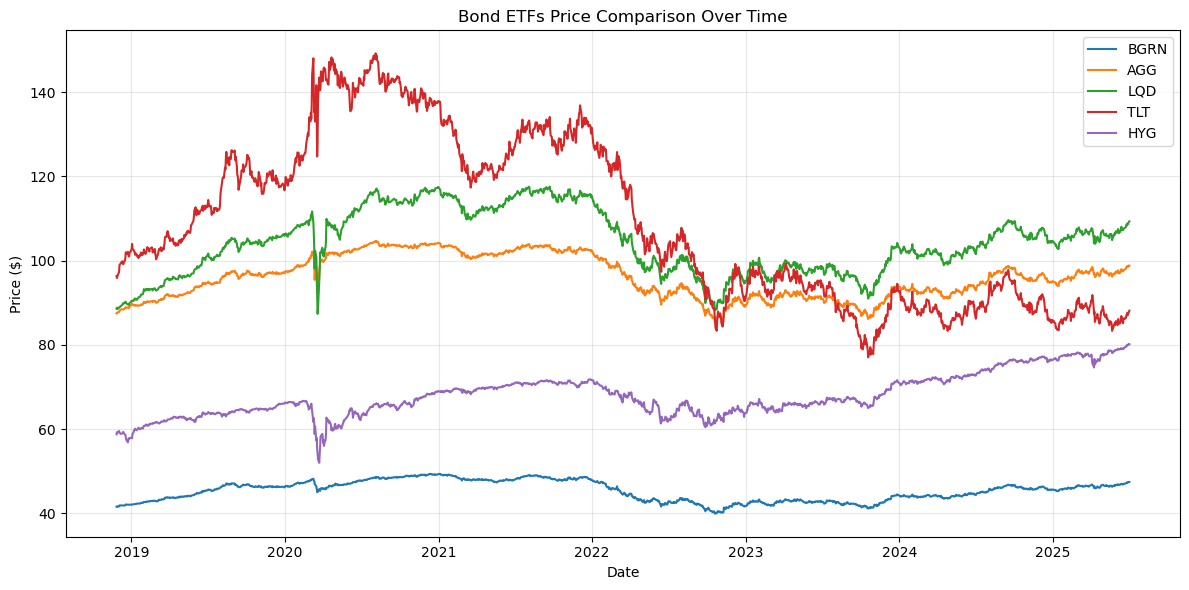

In [90]:
plt.figure(figsize=(12, 6))

plt.plot(bond_prices.index, bond_prices['BGRN'], label='BGRN')
plt.plot(bond_prices.index, bond_prices['AGG'], label='AGG')
plt.plot(bond_prices.index, bond_prices['LQD'], label='LQD')
plt.plot(bond_prices.index, bond_prices['TLT'], label='TLT')
plt.plot(bond_prices.index, bond_prices['HYG'], label='HYG')

plt.title("Bond ETFs Price Comparison Over Time")
plt.xlabel('Date')
plt.ylabel('Price ($)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join('plots', 'bond_comparison_price_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

Plot saved to plots\normalized_bond_comparison_price_plot.png


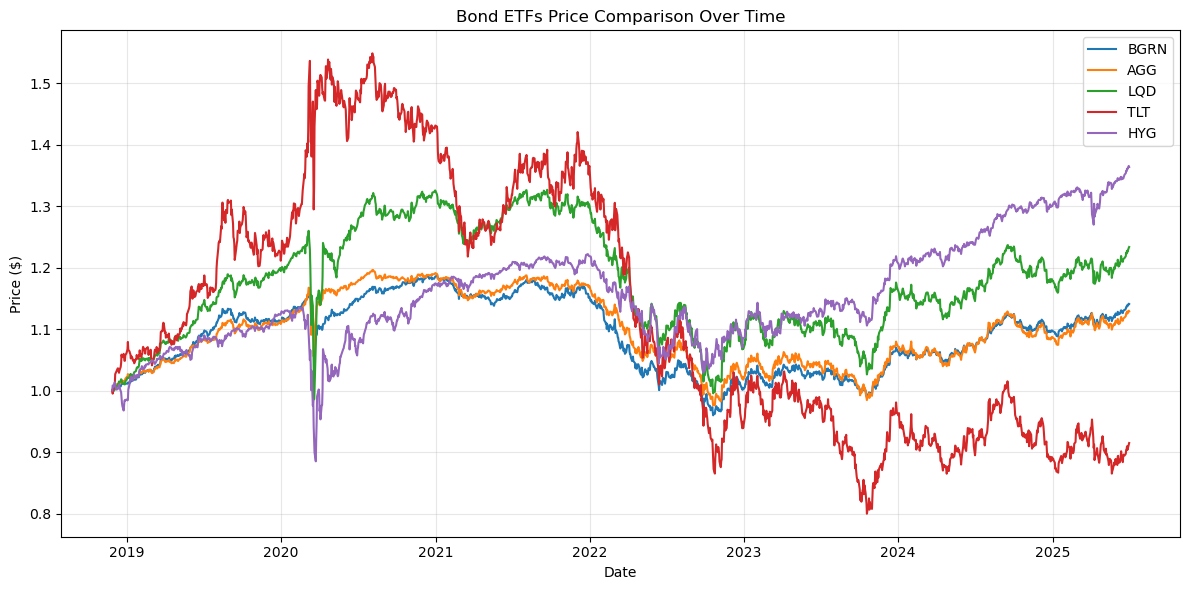

In [88]:
bond_norm = bond_prices / bond_prices.iloc[0]


plt.figure(figsize=(12, 6))

plt.plot(bond_norm.index, bond_norm['BGRN'], label='BGRN')
plt.plot(bond_norm.index, bond_norm['AGG'], label='AGG')
plt.plot(bond_norm.index, bond_norm['LQD'], label='LQD')
plt.plot(bond_norm.index, bond_norm['TLT'], label='TLT')
plt.plot(bond_norm.index, bond_norm['HYG'], label='HYG')

plt.title("Bond ETFs Price Comparison Over Time")
plt.xlabel('Date')
plt.ylabel('Price ($)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join('plots', 'normalized_bond_comparison_price_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

There appears to be a strong correlation between BGRN and AGG. I need to investigate this further. In general, it showed neither the best nor the worst results in terms of price changes throughout the years. BGRN exhibits typical behaviour for a bond ETF.

Plot saved to plots\bond_daily_returns_comparison_price_plot.png


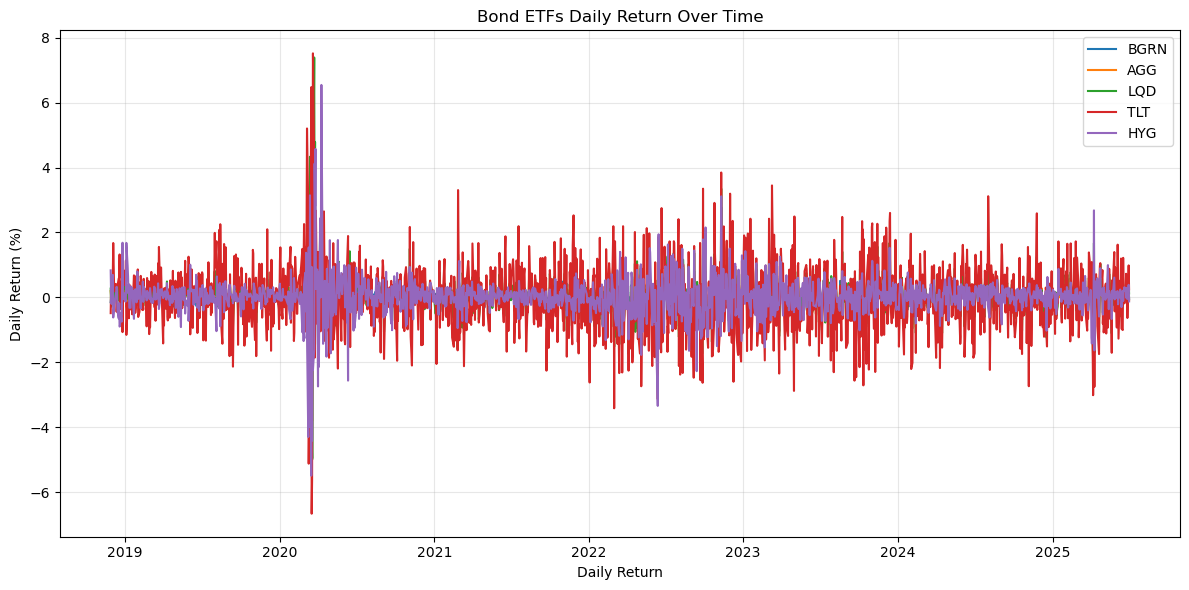

In [101]:
bond_returns = bond_prices.pct_change().dropna() * 100

plt.figure(figsize=(12, 6))

plt.plot(bond_returns.index, bond_returns['BGRN'], label='BGRN')
plt.plot(bond_returns.index, bond_returns['AGG'], label='AGG')
plt.plot(bond_returns.index, bond_returns['LQD'], label='LQD')
plt.plot(bond_returns.index, bond_returns['TLT'], label='TLT')
plt.plot(bond_returns.index, bond_returns['HYG'], label='HYG')

plt.title("Bond ETFs Daily Returns Over Time")
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join('plots', 'bond_daily_returns_comparison_price_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

Plot saved to plots\BGRN_AGG_daily_returns_comparison_price_plot.png


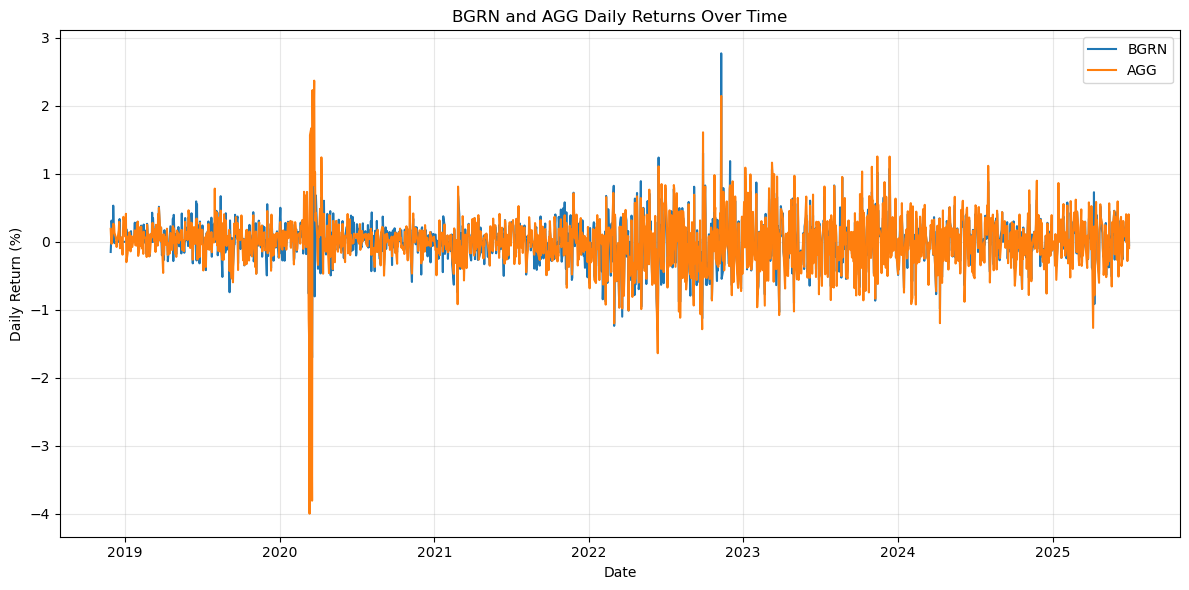

In [103]:
plt.figure(figsize=(12, 6))

plt.plot(bond_returns.index, bond_returns['BGRN'], label='BGRN')
plt.plot(bond_returns.index, bond_returns['AGG'], label='AGG')

plt.title("BGRN and AGG Daily Returns Over Time")
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join('plots', 'BGRN_AGG_daily_returns_comparison_price_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

Plot saved to plots\bond_weekly_returns_comparison_price_plot.png


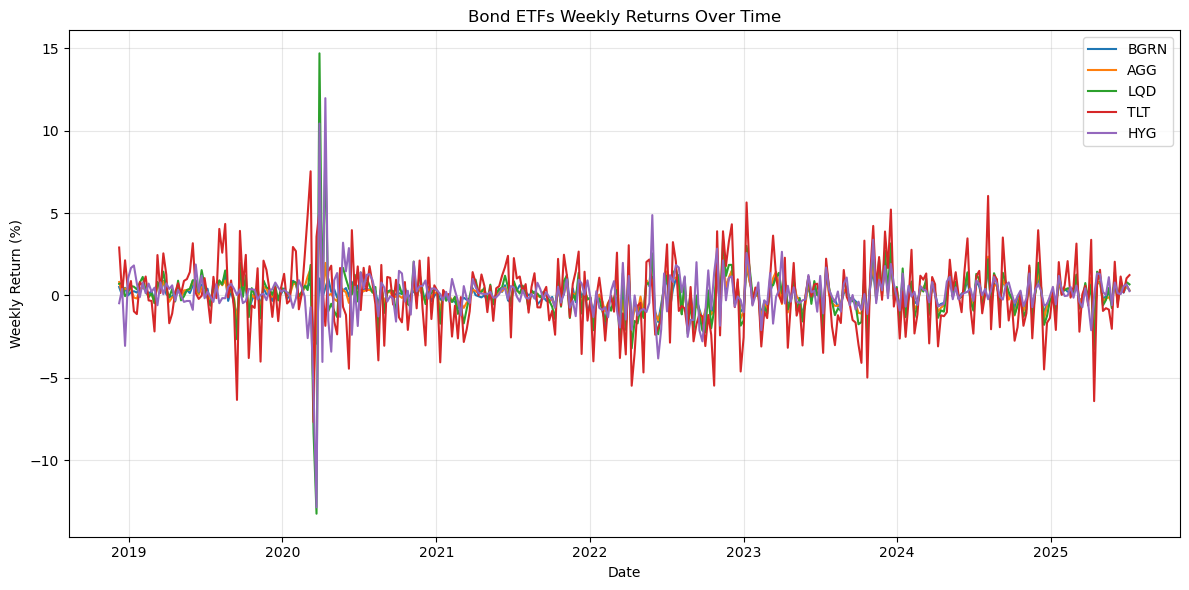

In [102]:
weekly_bond_prices = bond_prices.resample('W').last()
bond_log_returns = weekly_bond_prices.pct_change().dropna() * 100

plt.figure(figsize=(12, 6))

plt.plot(bond_log_returns.index, bond_log_returns['BGRN'], label='BGRN')
plt.plot(bond_log_returns.index, bond_log_returns['AGG'], label='AGG')
plt.plot(bond_log_returns.index, bond_log_returns['LQD'], label='LQD')
plt.plot(bond_log_returns.index, bond_log_returns['TLT'], label='TLT')
plt.plot(bond_log_returns.index, bond_log_returns['HYG'], label='HYG')

plt.title("Bond ETFs Weekly Returns Over Time")
plt.xlabel('Date')
plt.ylabel('Weekly Return (%)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join('plots', 'bond_weekly_returns_comparison_price_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

In [122]:
correlation_matrix = bond_returns.corr()

print(correlation_matrix.round(3))

       BGRN    AGG    LQD    TLT    HYG
BGRN  1.000  0.836  0.751  0.760  0.422
AGG   0.836  1.000  0.842  0.832  0.398
LQD   0.751  0.842  1.000  0.669  0.590
TLT   0.760  0.832  0.669  1.000  0.074
HYG   0.422  0.398  0.590  0.074  1.000


Plot saved to plots\bond_correlation_matrix.png


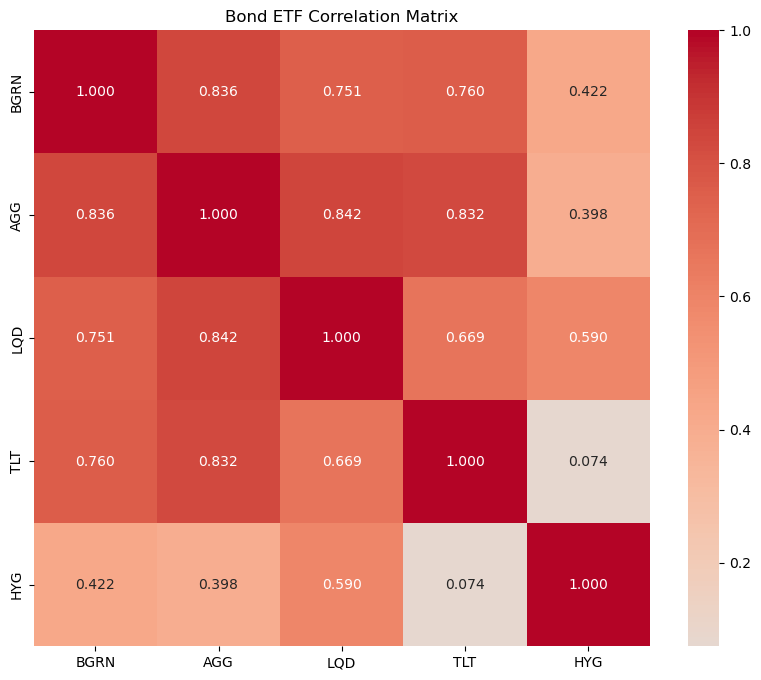

In [123]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f')
plt.title('Bond ETF Correlation Matrix')

plot_path = os.path.join('plots', 'bond_correlation_matrix.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

Plot saved to plots\bond_rolling_correlation_plot.png


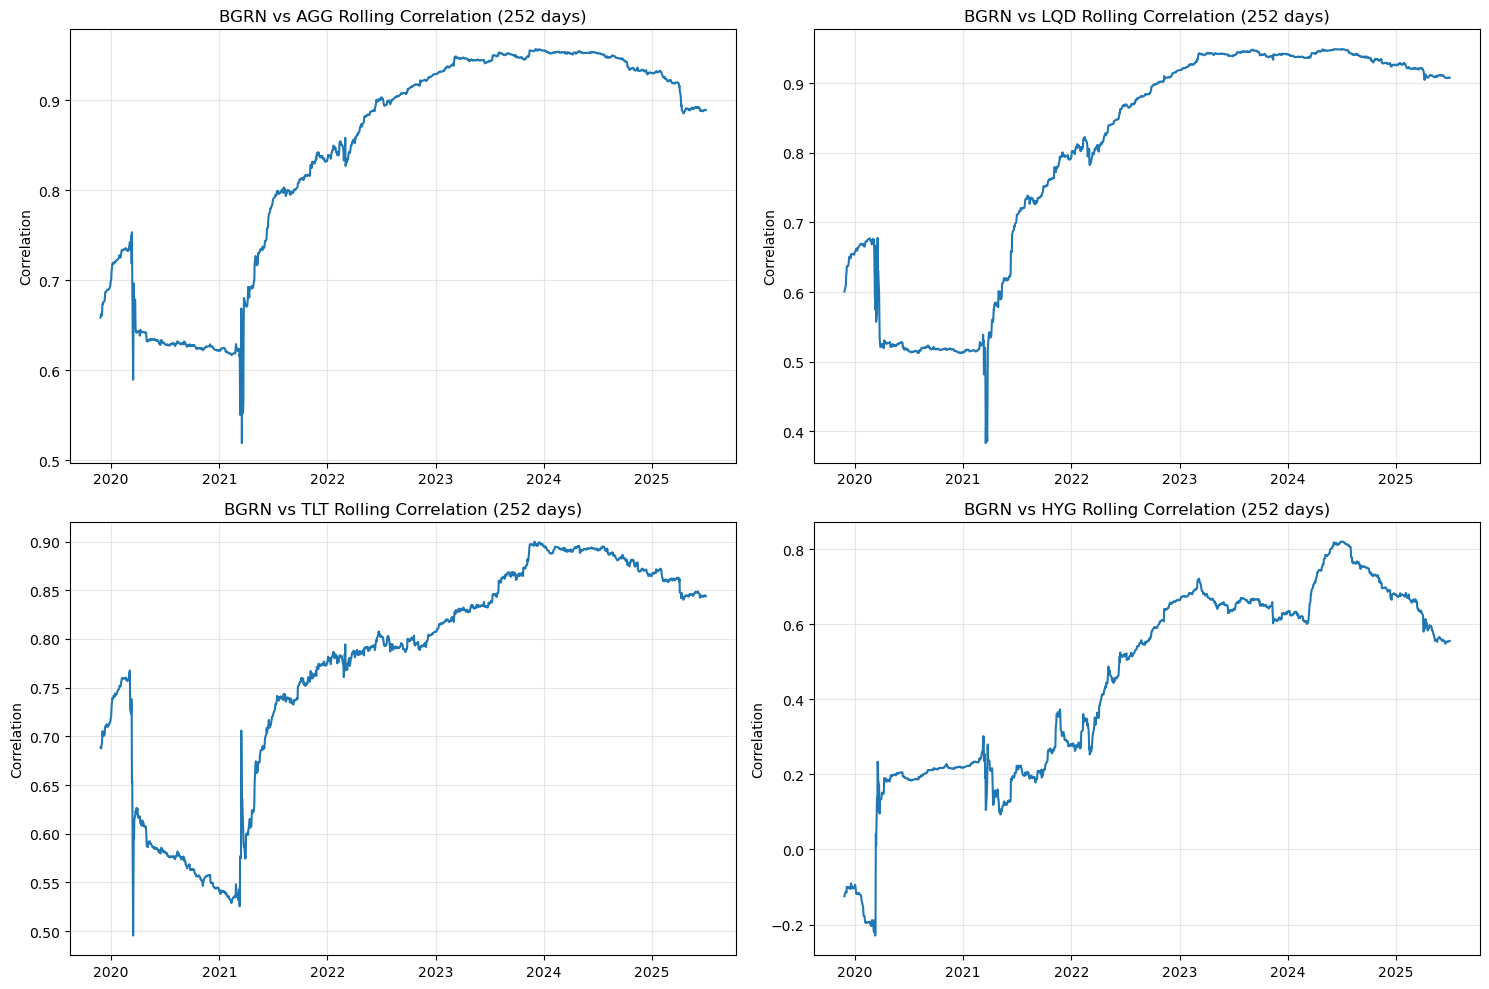

In [134]:
window = 252
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

benchmarks = ['AGG', 'LQD', 'TLT', 'HYG']
for i, benchmark in enumerate(benchmarks):
    row, col = i // 2, i % 2
    rolling_corr = bond_returns['BGRN'].rolling(window).corr(bond_returns[benchmark])
    axes[row, col].plot(rolling_corr.index, rolling_corr.values)
    axes[row, col].set_title(f'BGRN vs {benchmark} Rolling Correlation ({window} days)')
    axes[row, col].grid(True, alpha=0.3)
    axes[row, col].set_ylabel('Correlation')


plot_path = os.path.join('plots', 'bond_rolling_correlation_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.tight_layout()
plt.show()

As we can see, BGRN behaves like a typical bond ETF. Green bonds don't provide diversification within the bond market. All bonds move together during market stress. It's clear that BGRN has been converging rapidly with other bonds in recent years.

In [ ]:
simple_returns = bond_prices.pct_change().dropna()
log_returns = np.log(bond_prices / bond_prices.shift(1)).dropna()

# Cell: Statistical comparison
def calculate_bond_metrics(returns_df, returns_type="Simple"):
    """Calculate comprehensive bond ETF metrics"""
    results = {}
    
    for etf in returns_df.columns:
        returns = returns_df[etf]
        results[etf] = {
            'Annual_Volatility': returns.std() * np.sqrt(252),
            'Daily_Volatility': returns.std(),
            'Annual_Return': returns.mean() * 252,
            'Sharpe_Ratio': (returns.mean() / returns.std()) * np.sqrt(252),
            'Skewness': stats.skew(returns),
            'Kurtosis': stats.kurtosis(returns),
            'VaR_5%': returns.quantile(0.05),
            'CVaR_5%': returns[returns <= returns.quantile(0.05)].mean(),
            'Max_Drawdown': (returns.cumsum() - returns.cumsum().expanding().max()).min()
        }
    
    return pd.DataFrame(results).T

# Calculate for both return types
simple_metrics = calculate_bond_metrics(simple_returns, "Simple")
log_metrics = calculate_bond_metrics(log_returns, "Log")

print("=== SIMPLE RETURNS ANALYSIS ===")
print(simple_metrics.round(4))
print("\n=== LOG RETURNS ANALYSIS ===")
print(log_metrics.round(4))

=== SIMPLE RETURNS ANALYSIS ===
      Annual_Volatility  Daily_Volatility  Annual_Return  Sharpe_Ratio  \
BGRN             0.0522            0.0033         0.0212        0.4052   
AGG              0.0627            0.0039         0.0199        0.3179   
LQD              0.1016            0.0064         0.0367        0.3612   
TLT              0.1682            0.0106        -0.0015       -0.0086   
HYG              0.0961            0.0061         0.0522        0.5428   

      Skewness  Kurtosis  VaR_5%  CVaR_5%  Max_Drawdown  
BGRN    0.0117    4.5705 -0.0055  -0.0077       -0.2095  
AGG    -1.0111   14.9219 -0.0057  -0.0090       -0.2005  
LQD     0.5060   22.8591 -0.0091  -0.0142       -0.2806  
TLT     0.1567    4.2926 -0.0167  -0.0226       -0.6145  
HYG     0.1091   22.0667 -0.0080  -0.0142       -0.2425  

=== LOG RETURNS ANALYSIS ===
      Annual_Volatility  Daily_Volatility  Annual_Return  Sharpe_Ratio  \
BGRN             0.0522            0.0033         0.0198        0.3792 